In [1]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1264 sha256=c44b97a0b954be563d892067d0c5dcd9be2a024971fc744f5b2dcd95fc57a2ae
  Stored in directory: c:\users\wldot\appdata\local\pip\cache\wheels\d4\c8\5b\b5be9c20e5e4503d04a6eac8a3cd5c2393505c29f02bea0960
Successfully built bs4


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [15]:
import yfinance as yf

# Extract Tesla stock data
tesla_stock = yf.download("TSLA", start="2023-01-01", end="2023-08-30")

print(tesla_stock)


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  118.470001  118.800003  104.639999  108.099998  108.099998   
2023-01-04  109.110001  114.589996  107.519997  113.639999  113.639999   
2023-01-05  110.510002  111.750000  107.160004  110.339996  110.339996   
2023-01-06  103.000000  114.389999  101.809998  113.059998  113.059998   
2023-01-09  118.959999  123.519997  117.110001  119.769997  119.769997   
...                ...         ...         ...         ...         ...   
2023-08-23  229.339996  238.979996  229.289993  236.860001  236.860001   
2023-08-24  238.660004  238.919998  228.179993  230.039993  230.039993   
2023-08-25  231.309998  239.000000  230.350006  238.589996  238.589996   
2023-08-28  242.580002  244.380005  235.350006  238.820007  238.820007   
2023-08-29  238.580002  257.480011  237.770

In [22]:
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

revenue_data = []
tables = soup.find_all("table", class_="table")
table = None

for t in tables:
    if "Tesla Quarterly Revenue" in t.get_text():
        table = t
        break

if table:
    rows = table.find_all("tr")[1:]  # Exclude header row

    for row in rows:
        cols = row.find_all("td")
        year = cols[0].text
        revenue = cols[1].text.replace("$", "").replace(",", "")
        revenue_data.append((year, int(revenue)))

    print(revenue_data)
else:
    print("Table not found on the page.")


Table not found on the page.


In [18]:

import yfinance as yf

# Extract GameStop stock data
gamestop_stock = yf.download("GME", start="2023-01-01", end="2023-08-30")

print(gamestop_stock)



[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-03  18.639999  19.260000  17.090000  17.200001  17.200001  5135200
2023-01-04  17.250000  17.930000  16.900000  17.320000  17.320000  3939300
2023-01-05  17.059999  17.260000  15.890000  16.219999  16.219999  6066200
2023-01-06  16.000000  16.570000  15.410000  16.459999  16.459999  4823400
2023-01-09  16.650000  17.129999  16.360001  16.379999  16.379999  3522600
...               ...        ...        ...        ...        ...      ...
2023-08-23  17.250000  17.340000  16.879999  16.889999  16.889999  2909100
2023-08-24  16.940001  16.980000  16.180000  16.360001  16.360001  3624500
2023-08-25  16.500000  17.180000  16.450001  17.129999  17.129999  3416400
2023-08-28  17.350000  18.110001  17.250000  17.570000  17.570000  3005500
2023-08-29  17.600000  18.54999

In [23]:
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

revenue_data = []

# Find the relevant data on the page
tables = soup.find_all("table", class_="historical_data_table")
table = None

for t in tables:
    if "GameStop Quarterly Revenue" in t.get_text():
        table = t
        break

if table:
    rows = table.find_all("tr")[1:]  # Exclude header row

    for row in rows:
        cols = row.find_all("td")
        year = cols[0].text
        revenue = cols[1].text.replace("$", "").replace(",", "")
        revenue_data.append((year, int(revenue)))

    print(revenue_data)
else:
    print("Table not found on the page.")


Table not found on the page.


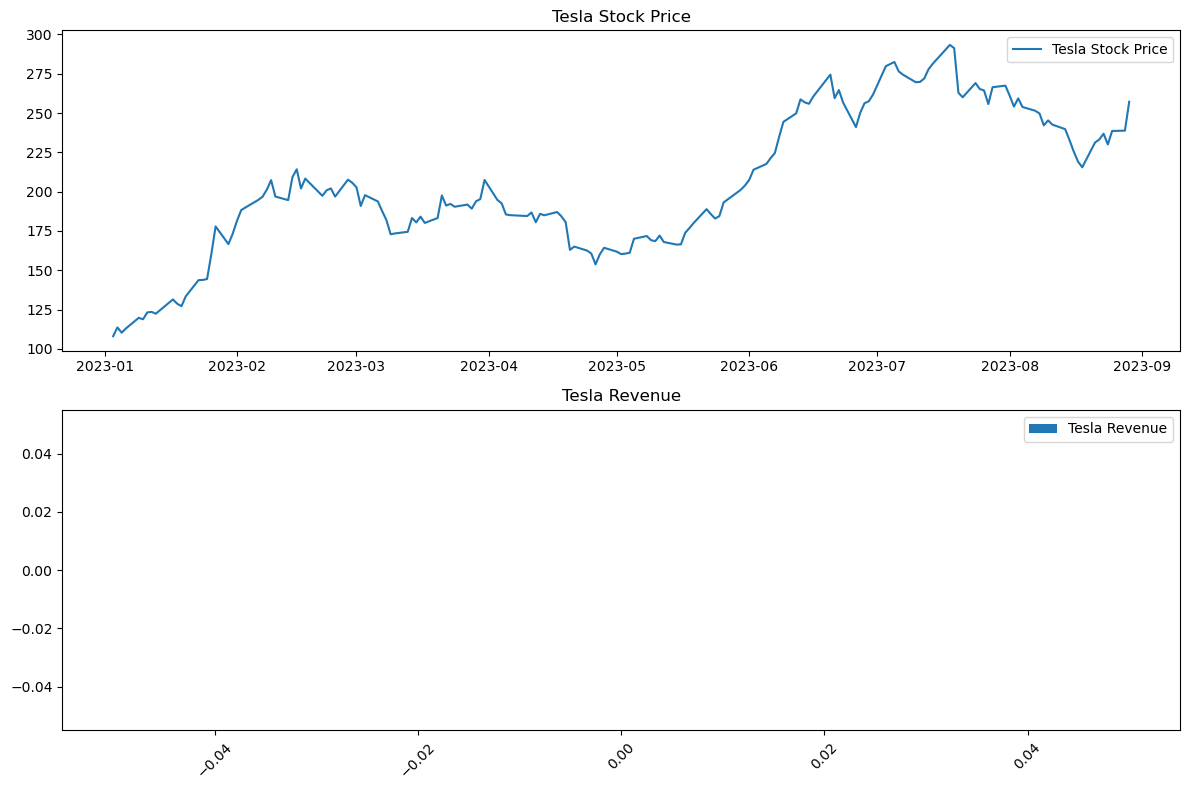

NameError: name 'gamestop_revenue_data' is not defined

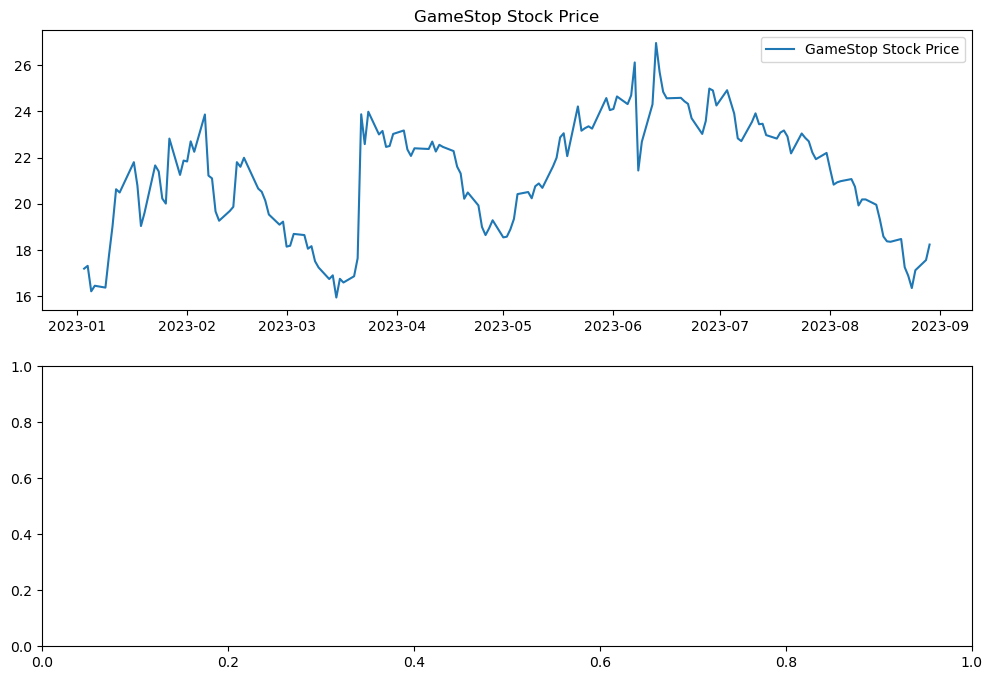

In [19]:

import matplotlib.pyplot as plt

# Assuming you already have 'tesla_stock', 'revenue_data' for Tesla, and 'gamestop_stock' for GameStop

# Creating the Tesla dashboard
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(tesla_stock['Close'], label='Tesla Stock Price')
plt.title('Tesla Stock Price')
plt.legend()

plt.subplot(2, 1, 2)
years = [entry[0] for entry in revenue_data]
revenues = [entry[1] for entry in revenue_data]
plt.bar(years, revenues, label='Tesla Revenue')
plt.title('Tesla Revenue')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Creating the GameStop dashboard
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(gamestop_stock['Close'], label='GameStop Stock Price')
plt.title('GameStop Stock Price')
plt.legend()

plt.subplot(2, 1, 2)
# Assuming you have a 'gamestop_revenue_data' list similar to 'revenue_data' for GameStop
gamestop_years = [entry[0] for entry in gamestop_revenue_data]
gamestop_revenues = [entry[1] for entry in gamestop_revenue_data]
plt.bar(gamestop_years, gamestop_revenues, label='GameStop Revenue')
plt.title('GameStop Revenue')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
z

NameError: name 'tesla_revenue' is not defined